In [1]:
from src import visualization as vis
from src import pre_process
from src import cnn

import matplotlib.pyplot as plt
from IPython.display import display
from keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")
#alejandro.gutierrez@sdggroup.com

In [2]:


# napari()

In [3]:
# 1. Creation of dataframes for each channel independently and all together
blue_df, green_df, red_df, df = pre_process.create_df("D:/TFM/Microscopy/video/copies/channels/")
red = red_df.drop(columns = ["Sample", "Duplicates"])

def save_df(df_list, path_list, index = True):
    for df, path in zip(df_list, path_list): 
        df.to_csv(path, index = index)
        print(f'Dataframe has been saved to {path}')

df_list = [blue_df, green_df, red_df, df]
path_list = ["C:/Users/saraa/TFM/Microscopy/data/blue","C:/Users/saraa/TFM/Microscopy/data/green", "C:/Users/saraa/TFM/Microscopy/data/red","C:/Users/saraa/TFM/Microscopy/data/rgb"]
save_df(df_list, path_list)

['D:/TFM/Microscopy/video/copies/channels/blue', 'D:/TFM/Microscopy/video/copies/channels/green', 'D:/TFM/Microscopy/video/copies/channels/red']
Dataframe has been saved to C:/Users/saraa/TFM/Microscopy/data/blue
Dataframe has been saved to C:/Users/saraa/TFM/Microscopy/data/green
Dataframe has been saved to C:/Users/saraa/TFM/Microscopy/data/red
Dataframe has been saved to C:/Users/saraa/TFM/Microscopy/data/rgb


In [4]:
def masks_df(input_stack, type, output_df):
    # 2. Generate masks for each microscopy image stack 
    cnn.mask(input_stack, type)
    # 3. Generate mask dataframe
    maskdf = pre_process.mask_df(output_df)
    return maskdf

input_stack = "D:\\TFM\\Microscopy\\video\\3288-1-AP-OP.czi"
type = "czi"
output_df = 'C:/Users/saraa/TFM/mask/nuclei/'
nucleiM = masks_df(input_stack, type, output_df)

(1, 201, 3, 1, 940, 940, 1)


100%|██████████| 603/603 [00:43<00:00, 13.71it/s]


In [5]:
df_list = [nucleiM]
path_list = ["C:/Users/saraa/TFM/Microscopy/data/nucleiM"]
save_df(df_list, path_list)

Dataframe has been saved to C:/Users/saraa/TFM/Microscopy/data/nucleiM


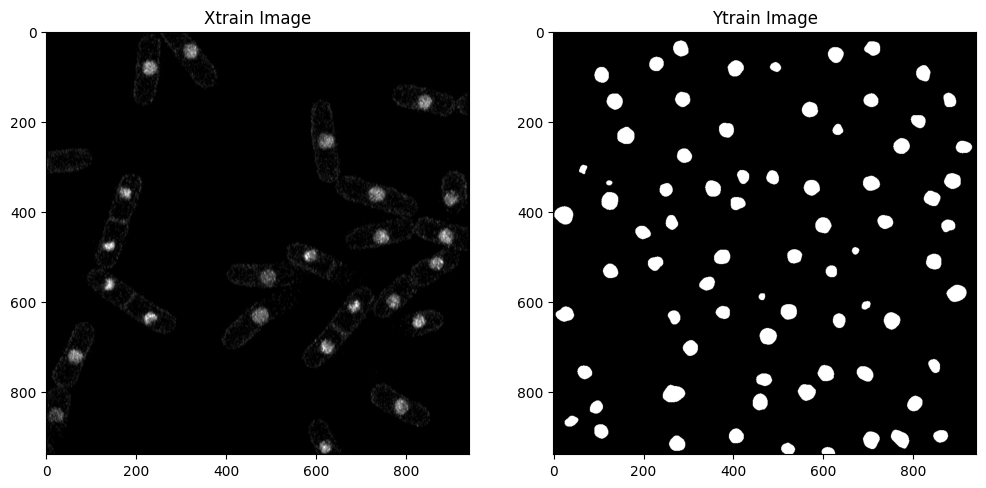

In [6]:
Xtrain, Xtest, Ytrain, Ytest = pre_process.train_valid_split(red, nucleiM)
pre_process.plot_training_data(Xtrain, Ytrain)

In [7]:
def split_shutil_train_val():
    # 1. Creating folders 
    data_path = "D:/TFM/Microscopy/video/copies/img/"
    folder_names= ["train_folder", "val_folder"]
    pre_process.createfolders(data_path,folder_names)

    data_path = "D:/TFM/Microscopy/video/copies/masks/"
    folder_names= ["train_folder", "val_folder"]
    pre_process.createfolders(data_path,folder_names)
    
    # 2. Splitting images data
    import shutil
    dfs = [Xtrain, Xtest]
    paths = ["D:/TFM/Microscopy/video/copies/img/train_folder/", "D:/TFM/Microscopy/video/copies/img/val_folder/"]
    for path, df in zip(paths, dfs):
        try: 
            pre_process.move_images(df, path)
        except shutil.Error:
            print(f"The files already exist in the destination path: {path}")
    
    # 3. Splitting masks data
    dfs = [Ytrain, Ytest]
    paths = ["D:/TFM/Microscopy/video/copies/masks/train_folder/", "D:/TFM/Microscopy/video/copies/masks/val_folder/"]
    for path, df in zip(paths, dfs):
        try: 
            pre_process.move_images(df, path)
        except shutil.Error:
            print(f"The files already exist in the destination path: {path}")  

# split_shutil_train_val()

In [8]:
def create_shutil_labels():
    # 1. Creating folders 
    train_path = "D:/TFM/Microscopy/video/copies/img/train_folder"
    val_path = "D:/TFM/Microscopy/video/copies/img/val_folder"
    # folder_names= ["red", "green", "blue"]
    folder_names= ["red"]
    pre_process.createfolders(train_path,folder_names)
    pre_process.createfolders(val_path,folder_names)

    train_path = "D:/TFM/Microscopy/video/copies/masks/train_folder"
    val_path = "D:/TFM/Microscopy/video/copies/masks/val_folder"
    # folder_names= ["red", "green", "blue"]
    folder_names= ["red"]
    pre_process.createfolders(train_path,folder_names)
    pre_process.createfolders(val_path,folder_names)
    
    # 2. Creating labels for training and testing data
    Xtrain["new_file_path"] = "D:/TFM/Microscopy/video/copies/img/train_folder/" + Xtrain["Image_id"] + ".tif"
    Xtrain["new_file_path"] = Xtrain["new_file_path"].astype(str)
    Xtest["new_file_path"] = "D:/TFM/Microscopy/video/copies/img/val_folder/" + Xtest["Image_id"] + ".tif"
    Xtest["new_file_path"] = Xtest["new_file_path"].astype(str)
    
    Ytrain["new_file_path"] = "D:/TFM/Microscopy/video/copies/masks/train_folder/" + Ytrain["Timepoint"] + ".png"
    Ytrain["new_file_path"] = Ytrain["new_file_path"].astype(str)
    Ytest["new_file_path"] = "D:/TFM/Microscopy/video/copies/masks/val_folder/" + Ytest["Timepoint"] + ".png"
    Ytest["new_file_path"] = Ytest["new_file_path"].astype(str)
    
    # 3. Save dataframe
    Xtrain.to_csv("C:/Users/saraa/TFM/Microscopy/data/img_training", index = True)
    Xtest.to_csv("C:/Users/saraa/TFM/Microscopy/data/img_testing", index = True)
    Ytrain.to_csv("C:/Users/saraa/TFM/Microscopy/data/mask_training", index = True)
    Ytest.to_csv("C:/Users/saraa/TFM/Microscopy/data/mask_testing", index = True)

    # 4. Splitting data for images 
    img_train_path_red = "D:/TFM/Microscopy/video/copies/img/train_folder/red"
    # train_path_green = "D:/TFM/Microscopy/video/copies/train_folder/green"
    # train_path_blue = "D:/TFM/Microscopy/video/copies/train_folder/blue"
    pre_process.images_class(Xtrain, img_train_path_red)    

    img_val_path_red = "D:/TFM/Microscopy/video/copies/img/val_folder/red"
    # val_path_green = "D:/TFM/Microscopy/video/copies/val_folder/green"
    # val_path_blue = "D:/TFM/Microscopy/video/copies/val_folder/blue"
    pre_process.images_class(Xtest, img_val_path_red)

    # 5. Splitting data for masks
    mask_train_path_red = "D:/TFM/Microscopy/video/copies/masks/train_folder/red"
    # train_path_green = "D:/TFM/Microscopy/video/copies/train_folder/green"
    # train_path_blue = "D:/TFM/Microscopy/video/copies/train_folder/blue"
    pre_process.images_class(Ytrain, mask_train_path_red)    

    mask_val_path_red = "D:/TFM/Microscopy/video/copies/masks/val_folder/red"
    # val_path_green = "D:/TFM/Microscopy/video/copies/val_folder/green"
    # val_path_blue = "D:/TFM/Microscopy/video/copies/val_folder/blue"
    pre_process.images_class(Ytest, mask_val_path_red)

# create_shutil_labels()    

In [9]:
img_train_path = "D:/TFM/Microscopy/video/copies/img/train_folder/"
img_val_path = "D:/TFM/Microscopy/video/copies/img/val_folder/"
mask_train_path = "D:/TFM/Microscopy/video/copies/masks/train_folder/"
mask_val_path = "D:/TFM/Microscopy/video/copies/masks/val_folder/"

img_gen, valid_img_gen, mask_gen, valid_mask_gen = pre_process.get_generator(img_train_path, img_val_path, 
                                                                             mask_train_path, mask_val_path)

Found 160 images belonging to 1 classes.


Found 41 images belonging to 1 classes.
Found 160 images belonging to 1 classes.
Found 41 images belonging to 1 classes.


In [10]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices("GPU")
physical_devices

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [11]:
train_generator =  pre_process.combine_generators(img_gen, mask_gen)
valid_generator = pre_process.combine_generators(valid_img_gen, valid_mask_gen)

In [12]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)
strategy = tf.distribute.MirroredStrategy(logical_gpus)
print(strategy)

1 Physical GPU, 2 Logical GPUs
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')


In [13]:
def UNETensorflow():
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.allow_growth = True  # Allow GPU memory growth
    run_opts = tf.compat.v1.RunOptions(report_tensor_allocations_upon_oom = True)

    strategy = tf.distribute.MirroredStrategy(logical_gpus)
    with strategy.scope():
   
    # 1. Initialize the model 
        input_shape = (480, 480, 3) # Height and Weight has to be multiples of 16
                                    # Also three channels, because the CNN expects an 
                                    # RGB image 
        model = cnn.build_unet(input_shape)

        # 2. See model architecture
        model.compile(optimizer = Adam(lr = 1e-3), loss='binary_crossentropy', 
                      metrics=['accuracy'])
        model.summary()

        # 3. Train the model and save weights. 
        path = "C:/Users/saraa/model_for_nuclei.h5"
        tensorboard = "logs"

        print("Training the model...")
        history = cnn.fitting(model, train_generator, valid_generator, weightpath= path, 
                              tensorboard= tensorboard)

        print("Evaluating the model...")
        # 4. Model perform evaluation 
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]
        epochs = range(1, len(loss) + 1)
        plt.plot(epochs, loss, "y", label="Training loss")
        plt.plot(epochs, val_loss, "r", label="Validation loss")
        plt.title("Training and validation loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

        acc = history.history["accuracy"]
        val_acc = history.history["val_accuracy"]
        plt.plot(epochs, acc, "y", label="Training acc")
        plt.plot(epochs, val_acc, "r", label="Validation acc")
        plt.title("Training and validation accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

        import numpy as np
        from keras.preprocessing import image
        from PIL import ImageOps
        val_pred = model.predict(valid_generator)

        def display_mask(i):
            mask = np.argmax(val_pred[i], axis=-1)
            mask = np.expand_dims(mask, axis = -1)
            img = ImageOps.autocontrast(image.arra_to_img(mask))
            display(img)

        i = 10
        display_mask(i)

UNETensorflow()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensor

ResourceExhaustedError: Graph execution error:

Detected at node 'replica_1/U-Net/batch_normalization/FusedBatchNormV3' defined at (most recent call last):
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\threading.py", line 890, in _bootstrap
      self._bootstrap_inner()
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\threading.py", line 932, in _bootstrap_inner
      self.run()
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 850, in call
      outputs = self._fused_batch_norm(inputs, training=training)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 660, in _fused_batch_norm
      output, mean, variance = control_flow_util.smart_cond(
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\utils\control_flow_util.py", line 108, in smart_cond
      return tf.__internal__.smart_cond.smart_cond(
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 634, in _fused_batch_norm_training
      return tf.compat.v1.nn.fused_batch_norm(
Node: 'replica_1/U-Net/batch_normalization/FusedBatchNormV3'
Detected at node 'replica_1/U-Net/batch_normalization/FusedBatchNormV3' defined at (most recent call last):
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\threading.py", line 890, in _bootstrap
      self._bootstrap_inner()
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\threading.py", line 932, in _bootstrap_inner
      self.run()
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 850, in call
      outputs = self._fused_batch_norm(inputs, training=training)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 660, in _fused_batch_norm
      output, mean, variance = control_flow_util.smart_cond(
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\utils\control_flow_util.py", line 108, in smart_cond
      return tf.__internal__.smart_cond.smart_cond(
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 634, in _fused_batch_norm_training
      return tf.compat.v1.nn.fused_batch_norm(
Node: 'replica_1/U-Net/batch_normalization/FusedBatchNormV3'
Detected at node 'replica_1/U-Net/batch_normalization/FusedBatchNormV3' defined at (most recent call last):
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\threading.py", line 890, in _bootstrap
      self._bootstrap_inner()
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\threading.py", line 932, in _bootstrap_inner
      self.run()
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 850, in call
      outputs = self._fused_batch_norm(inputs, training=training)
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 660, in _fused_batch_norm
      output, mean, variance = control_flow_util.smart_cond(
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\utils\control_flow_util.py", line 108, in smart_cond
      return tf.__internal__.smart_cond.smart_cond(
    File "c:\Users\saraa\miniconda3\envs\tfm2\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 634, in _fused_batch_norm_training
      return tf.compat.v1.nn.fused_batch_norm(
Node: 'replica_1/U-Net/batch_normalization/FusedBatchNormV3'
3 root error(s) found.
  (0) RESOURCE_EXHAUSTED:  OOM when allocating tensor with shape[4,64,480,480] and type float on /job:localhost/replica:0/task:0/device:GPU:1 by allocator GPU_1_bfc
	 [[{{node replica_1/U-Net/batch_normalization/FusedBatchNormV3}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

	 [[gradient_tape/replica_1/U-Net/batch_normalization_2/FusedBatchNormGradV3/_474]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

  (1) RESOURCE_EXHAUSTED:  OOM when allocating tensor with shape[4,64,480,480] and type float on /job:localhost/replica:0/task:0/device:GPU:1 by allocator GPU_1_bfc
	 [[{{node replica_1/U-Net/batch_normalization/FusedBatchNormV3}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

	 [[div_no_nan_1/ReadVariableOp_2/_158]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

  (2) RESOURCE_EXHAUSTED:  OOM when allocating tensor with shape[4,64,480,480] and type float on /job:localhost/replica:0/task:0/device:GPU:1 by allocator GPU_1_bfc
	 [[{{node replica_1/U-Net/batch_normalization/FusedBatchNormV3}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_12895]

In [ ]:
# # 2. Dataset creation
# import torch
# from torch.utils.data import DataLoader
# from torch.utils.data import Dataset
# from torchvision import transforms
# import os
# from PIL import Image
# import numpy as np
# # 1. Data paths 
# image_dir = "D:/TFM/Microscopy/video/copies/img/"
# mask_dir = "D:/TFM/Microscopy/video/copies/img/"

# class NucleiDataset(Dataset):
#     def _init__(self, image_dir, mask_dir, transform = None):
#         self.image_dir = image_dir
#         self.mask_dir = mask_dir
#         self.transform = transform
#         self.images = os.listdir(image_dir)

#     def __len__(self):
#         return len(self.images)
    
#     def __getitem__(self, index):
#         img_path = os.path.join(self.image_dir, self.images[index])
#         mask_path = os.path.join(self.mask_dir, self.images[index].replace(".png", "_mask.gif"))
#         image = np.array(Image.open(img_path).convert("RGB"))
#         mask = np.array(Image.open(mask_path).convert("L"), dtype = np.float32)
#         mask[mask==255.00] = 1 

#         if self.transform is not None:
#             augmentations = self.transform(image = image, mask = mask)
        
#         return image, mask


In [ ]:
# model = cnn.UNet(in_channels=3, out_channels=1)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

In [ ]:
# criterion = torch.nn.BCELoss()  # Binary Cross Entropy Loss for binary segmentation
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# num_epochs = 10

# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     for inputs, targets in train_loader:
#         inputs, targets = inputs.to(device), targets.to(device)
        
#         # Zero the parameter gradients
#         optimizer.zero_grad()
        
#         # Forward pass
#         outputs = model(inputs)
        
#         # Compute the loss
#         loss = criterion(outputs, targets)
        
#         # Backward pass and optimization
#         loss.backward()
#         optimizer.step()
        
#         running_loss += loss.item() * inputs.size(0)
    
#     epoch_loss = running_loss / len(train_loader.dataset)
#     print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

# print("Training finished.")

In [ ]:
# 4. Count the number of nuclei of each image. 
nuclei_df = cnn.nuclei_segmentation("C:\\Users\\saraa\\TFM\\mask\\nuclei\\")
nuclei_df


,Number of Nuclei
Timepoint,
0,6
1,6
2,6
3,6
4,6
...,...
196,79
197,81
198,90
